In [2]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
from pandas_datareader import data
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
cf.go_offline()


# Downloading stock data for large banks during the financial crisis using pandas datareader

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']


In [4]:
stocks= data.DataReader(tickers, 
                       start='2006-01-01', 
                       end='2016-01-01', 
                       data_source='yahoo')

In [5]:
stocks.head(5)

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  34.280807  370.934509  104.919411  26.663109  36.364140   
2006-01-04  33.916729  364.086212  103.470238  26.509205  36.389069   
2006-01-05  33.960411  365.892365  103.429543  26.589512  36.488869   
2006-01-06  33.909451  365.892365  104.894989  26.776842  36.526283   
2006-01-09  33.931290  364.161621  106.156952  27.211746  36.912933   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.523809  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.285755  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  20.263241  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  20.382265  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  20.379047  46.599998  483.899994  130.389999  40.669998  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   

Attributes                                                           
Symbols             C         GS         JPM         MS         WFC  
Date                                                                 
2006-01-03  1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04  1870960.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05  1143160.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06  1370210.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09  1680740.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

In [6]:
stocks=stocks.swaplevel(0,1,axis=1).sort_index(axis=1)
stocks

Symbols           BAC                                                          \
Attributes  Adj Close      Close       High        Low       Open      Volume   
Date                                                                            
2006-01-03  34.280807  47.080002  47.180000  46.150002  46.919998  16296700.0   
2006-01-04  33.916729  46.580002  47.240002  46.450001  47.000000  17757900.0   
2006-01-05  33.960411  46.639999  46.830002  46.320000  46.580002  14970700.0   
2006-01-06  33.909451  46.570000  46.910000  46.349998  46.799999  12599800.0   
2006-01-09  33.931290  46.599998  46.970001  46.360001  46.720001  15619400.0   
...               ...        ...        ...        ...        ...         ...   
2015-12-24  15.509130  17.270000  17.379999  17.219999  17.320000  29369400.0   
2015-12-28  15.383405  17.129999  17.230000  16.980000  17.219999  41777500.0   
2015-12-29  15.518112  17.280001  17.350000  17.160000  17.250000  45670400.0   
2015-12-30  15.311558  17.049999  17.240000  17.040001  17.200001  35066400.0   
2015-12-31  15.113990  16.830000  17.070000  16.830000  17.010000  47153000.0   

Symbols              C                                      ...         MS  \
Attributes   Adj Close       Close        High         Low  ...       High   
Date                                                        ...              
2006-01-03  370.934509  492.899994  493.799988  481.100006  ...  58.490002   
2006-01-04  364.086212  483.799988  491.000000  483.500000  ...  59.279999   
2006-01-05  365.892365  486.200012  487.799988  484.000000  ...  58.590000   
2006-01-06  365.892365  486.200012  489.000000  482.000000  ...  58.849998   
2006-01-09  364.161621  483.899994  487.399994  483.000000  ...  59.290001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   46.007008   52.709999   52.970001   52.450001  ...  32.709999   
2015-12-28   45.718975   52.380001   52.570000   51.959999  ...  32.360001   
2015-12-29   46.242680   52.980000   53.220001   52.740002  ...  32.700001   
2015-12-30   45.649151   52.299999   52.939999   52.250000  ...  32.650002   
2015-12-31   45.169086   51.750000   52.389999   51.750000  ...  32.299999   

Symbols                                            WFC                        \
Attributes        Low       Open     Volume  Adj Close      Close       High   
Date                                                                           
2006-01-03  56.740002  57.169998  5377000.0  20.523809  31.900000  31.975000   
2006-01-04  58.349998  58.700001  7977800.0  20.285755  31.530001  31.820000   
2006-01-05  58.020000  58.549999  5778000.0  20.263241  31.495001  31.555000   
2006-01-06  58.049999  58.770000  6889800.0  20.382265  31.680000  31.775000   
2006-01-09  58.619999  58.630001  4144500.0  20.379047  31.674999  31.825001   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.439999  32.570000  2798200.0  45.933815  54.820000  55.090000   
2015-12-28  31.950001  32.360001  5420300.0  45.816509  54.680000  54.779999   
2015-12-29  32.330002  32.439999  6388200.0  46.327637  55.290001  55.349998   
2015-12-30  32.200001  32.500000  5057200.0  45.992474  54.889999  55.310001   
2015-12-31  31.770000  31.910000  8154300.0  45.548393  54.360001  54.950001   

Symbols                                       
Attributes        Low       Open      Volume  
Date                                          
2006-01-03  31.195000  31.600000  11016400.0  
2006-01-04  31.365000  31.799999  10870000.0  
2006-01-05  31.309999  31.500000  10158000.0  
2006-01-06  31.385000  31.580000   8403800.0  
2006-01-09  31.555000  31.674999   5619600.0  
...               ...        ...         ...  
2015-12-24  54.709999  54.970001   4999400.0  
2015-12-28  54.169998  54.549999   8288800.0  
2015-12-29  54.990002  55.110001   7894900.0  
2015-12-30  54.790001  55.270000   8016900.0  
2015-12-31  54.220001  54.509998  109298

# Maximum closing prices for the stocks

In [7]:
stocks.xs('Close',level=1,axis=1).max()


Symbols
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [8]:
stocks.head()

Symbols           BAC                                                          \
Attributes  Adj Close      Close       High        Low       Open      Volume   
Date                                                                            
2006-01-03  34.280807  47.080002  47.180000  46.150002  46.919998  16296700.0   
2006-01-04  33.916729  46.580002  47.240002  46.450001  47.000000  17757900.0   
2006-01-05  33.960411  46.639999  46.830002  46.320000  46.580002  14970700.0   
2006-01-06  33.909451  46.570000  46.910000  46.349998  46.799999  12599800.0   
2006-01-09  33.931290  46.599998  46.970001  46.360001  46.720001  15619400.0   

Symbols              C                                      ...         MS  \
Attributes   Adj Close       Close        High         Low  ...       High   
Date                                                        ...              
2006-01-03  370.934509  492.899994  493.799988  481.100006  ...  58.490002   
2006-01-04  364.086212  483.799988  491.000000  483.500000  ...  59.279999   
2006-01-05  365.892365  486.200012  487.799988  484.000000  ...  58.590000   
2006-01-06  365.892365  486.200012  489.000000  482.000000  ...  58.849998   
2006-01-09  364.161621  483.899994  487.399994  483.000000  ...  59.290001   

Symbols                                            WFC                        \
Attributes        Low       Open     Volume  Adj Close      Close       High   
Date                                                                           
2006-01-03  56.740002  57.169998  5377000.0  20.523809  31.900000  31.975000   
2006-01-04  58.349998  58.700001  7977800.0  20.285755  31.530001  31.820000   
2006-01-05  58.020000  58.549999  5778000.0  20.263241  31.495001  31.555000   
2006-01-06  58.049999  58.770000  6889800.0  20.382265  31.680000  31.775000   
2006-01-09  58.619999  58.630001  4144500.0  20.379047  31.674999  31.825001   

Symbols                                       
Attributes        Low       Open      Volume  
Date                                          
2006-01-03  31.195000  31.600000  11016400.0  
2006-01-04  31.365000  31.799999  10870000.0  
2006-01-05  31.309999  31.500000  10158000.0  
2006-01-06  31.385000  31.580000   8403800.0  
2006-01-09  31.555000  31.674999   5619600.0  

[5 rows x 36 columns]

In [9]:
returns=pd.DataFrame()



In [10]:
for i in tickers:
    returns[i+' Return']=stocks[i]['Close'].pct_change()

In [11]:
returns.head(5)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [12]:
sns.pairplot(returns[1:],diag_kind='hist')

NameError: name 'sns' is not defined

In [13]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [14]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [15]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [16]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

# Analyzing the stocks throughout the duration

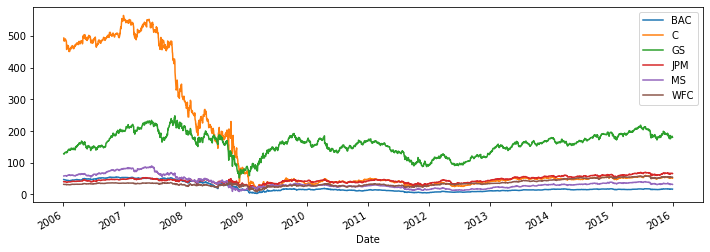

In [17]:
for tick in tickers:
    stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [21]:
stocks.xs(key='Close',axis=1,level='Attributes').iplot() #interactive chart

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

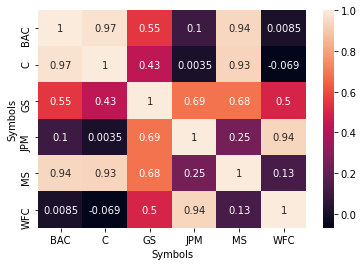

In [25]:
sns.heatmap(stocks.xs(key='Close',axis=1,level='Attributes').corr(),annot=True)

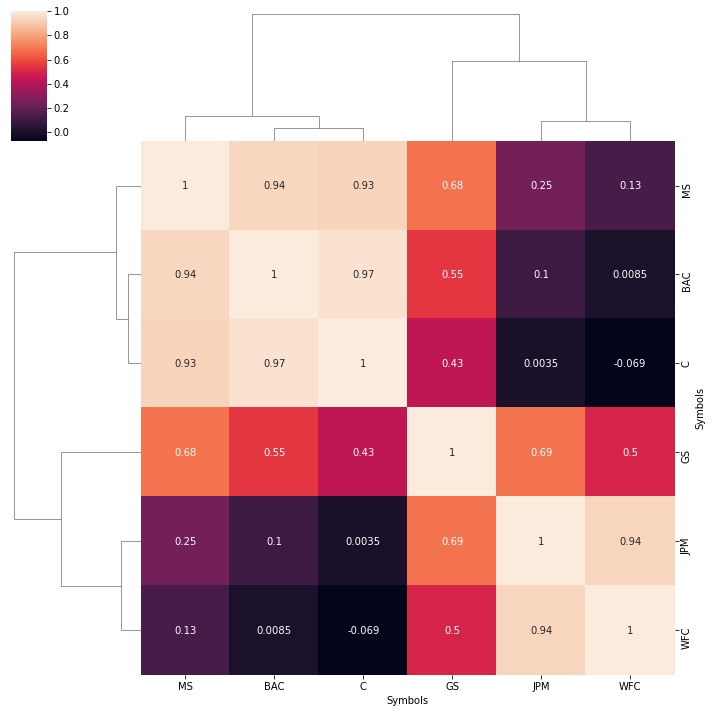

In [27]:
sns.clustermap(stocks.xs(key='Close',axis=1,level='Attributes').corr(),annot=True)

In [28]:
c_corr = stocks.xs(key='Close',axis=1,level='Attributes').corr()
c_corr.iplot(kind='heatmap',colorscale='rdylbu')